In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')
print(data_train.shape)
print(data_test.shape)

(9557, 143)
(23856, 142)


In [5]:
data_train.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [6]:
data_test.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,...,4,0,16,9,0,1,2.25,0.25,272.25,16
1,ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,...,41,256,1681,9,0,1,2.25,0.25,272.25,1681
2,ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,...,41,289,1681,9,0,1,2.25,0.25,272.25,1681
3,ID_a8db26a79,NaN,0,14,0,1,1,1,1.0,0,...,59,256,3481,1,256,0,1.00,0.00,256.00,3481
4,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,...,18,121,324,1,0,1,0.25,64.00,NaN,324


## 1. Identify the output variable.

In [7]:
Output = data_train.Target.value_counts().to_frame().reset_index().rename(columns={'index':'Label', 'Target':'Count'})
Output

,Label,Count
0,4,5996
1,2,1597
2,3,1209
3,1,755


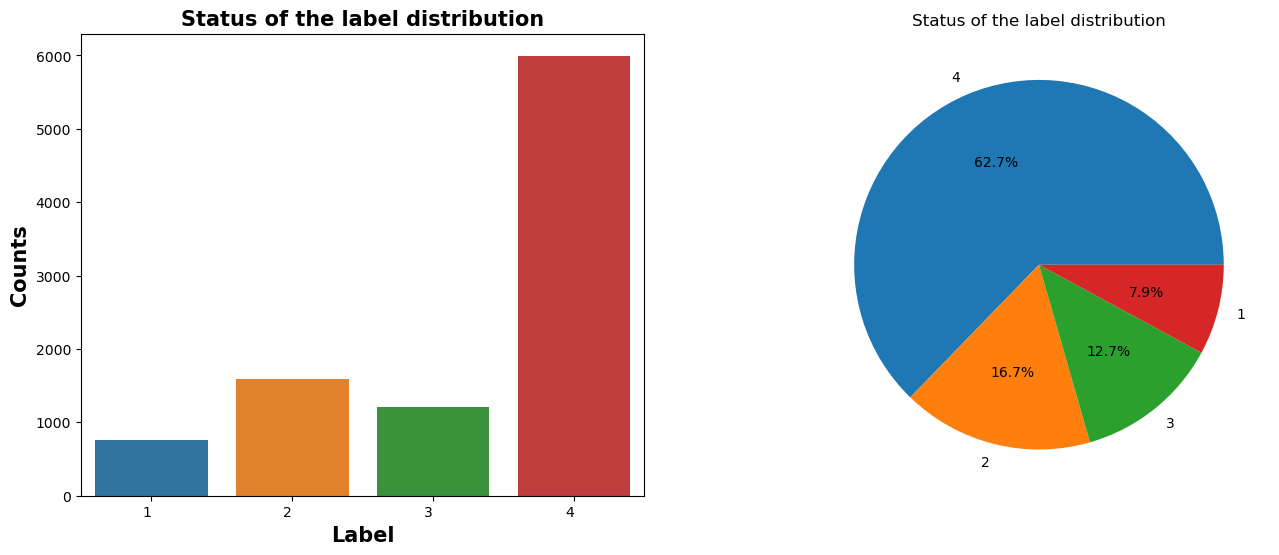

In [8]:
fig, ax = plt.subplots(1,2, figsize=(16,6))

bar = sns.barplot(x=Output.Label, y=Output.Count, ax=ax[0])
bar.set_xticklabels(bar.get_xticklabels(), rotation=0, ha="right")
bar.set_xlabel('Label', weight='bold', size=15)
bar.set_ylabel('Counts', weight='bold', size=15)
bar.set_title('Status of the label distribution', weight='bold', size=15)

ax[1].pie(Output.Count, labels = Output.Label, autopct='%1.1f%%')
ax[1].set_title('Status of the label distribution')

plt.show()

## 2.Understand the type of data.

In [9]:
#There are two types of variables in terms of data structure.
#One type is categorical (again it may contains categorical and/ numeical).
#Another type is continuous, which is depicted below in order to understand the pattern.

In [10]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


In [11]:
#There are:
#No of features that have data type 'float64' = 8
#No of features that have data type 'int64' = 130
#No of features that have data type 'object64' = 6
#Thus we need to convert these object data type to numerical to insert in model calculation.

In [12]:
for i in data_train.columns:
    data_type = data_train[i].dtype
    if data_type == 'object':
        print(i)

Id
idhogar
dependency
edjefe
edjefa


In [13]:
for i in data_train.columns:
    data_type = data_train[i].dtype
    if data_type == 'float':
        print(i)

v2a1
v18q1
rez_esc
meaneduc
overcrowding
SQBovercrowding
SQBdependency
SQBmeaned


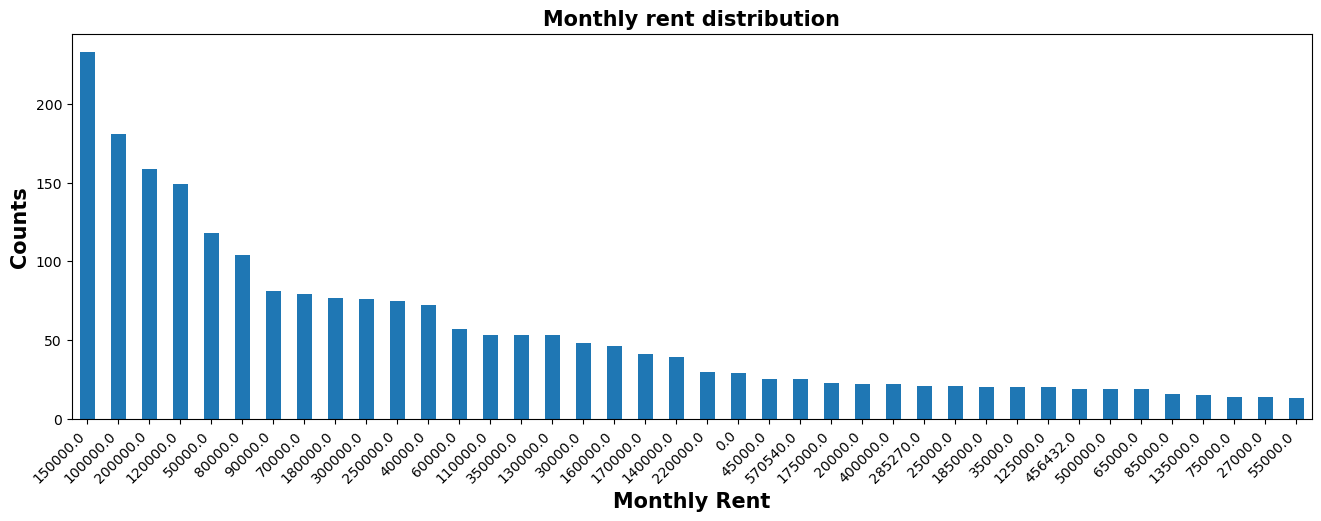

In [14]:
plt.figure(figsize=(16,5))
rent = data_train.v2a1.value_counts().head(40).plot(kind='bar')
rent.set_xticklabels(rent.get_xticklabels(), rotation=45, ha="right")
rent.set_xlabel('Monthly Rent', weight='bold', size=15)
rent.set_ylabel('Counts', weight='bold', size=15)
rent.set_title('Monthly rent distribution', weight='bold', size=15)
plt.show()

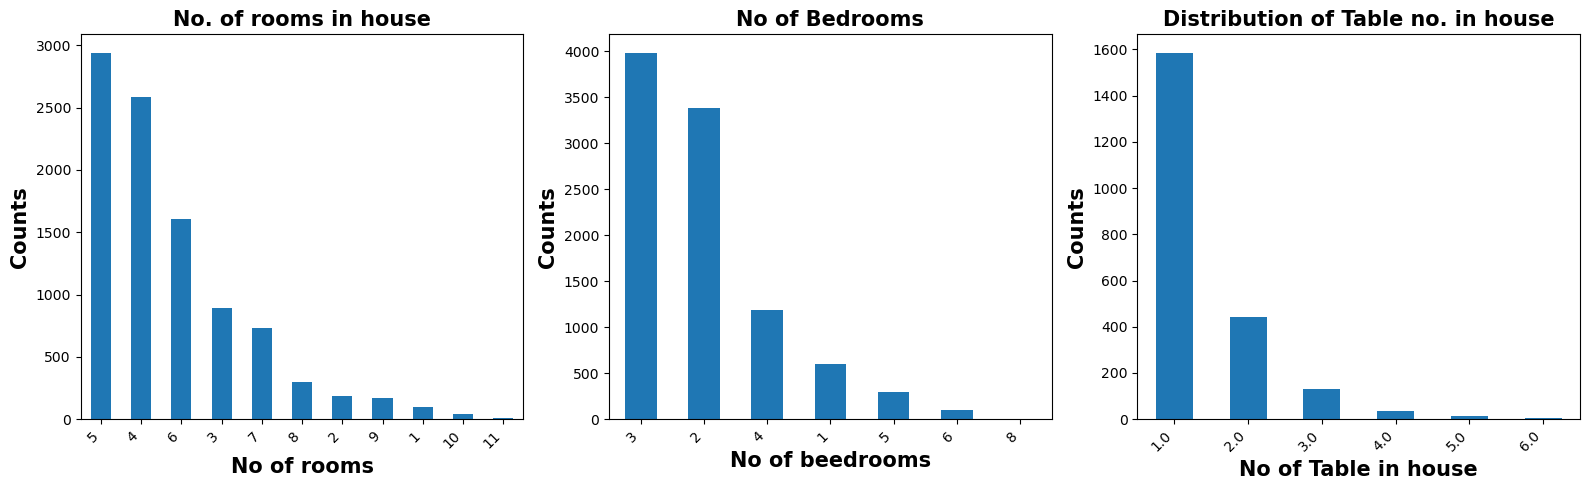

In [17]:
fig, ax = plt.subplots(1,3, figsize=(16,5))

room = data_train.rooms.value_counts().plot(kind='bar',ax=ax[0])
room.set_xticklabels(room.get_xticklabels(), rotation=45, ha="right")
room.set_xlabel('No of rooms', weight='bold', size=15)
room.set_ylabel('Counts', weight='bold', size=15)
room.set_title('No. of rooms in house', weight='bold', size=15)

bedroom = data_train.bedrooms.value_counts().plot(kind='bar',ax=ax[1])
bedroom.set_xticklabels(bedroom.get_xticklabels(), rotation=45, ha="right")
bedroom.set_xlabel('No of beedrooms', weight='bold', size=15)
bedroom.set_ylabel('Counts', weight='bold', size=15)
bedroom.set_title('No of Bedrooms', weight='bold', size=15)

table = data_train.v18q1.value_counts().plot(kind='bar',ax=ax[2])
table.set_xticklabels(table.get_xticklabels(), rotation=45, ha="right")
table.set_xlabel('No of Table in house', weight='bold', size=15)
table.set_ylabel('Counts', weight='bold', size=15)
table.set_title('Distribution of Table no. in house', weight='bold', size=15)

plt.tight_layout()


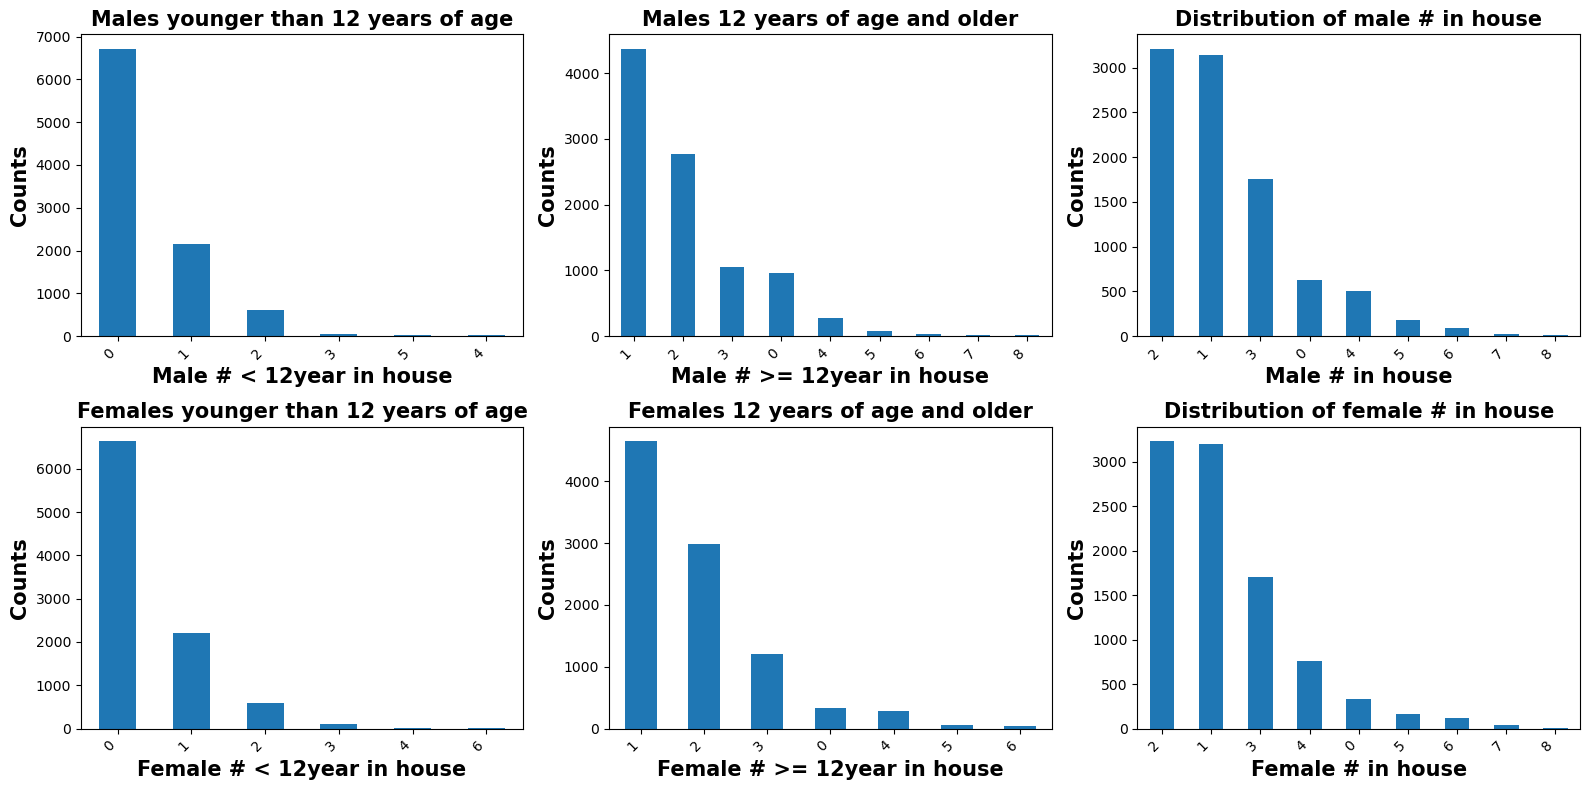

In [19]:
fig, ax = plt.subplots(2,3, figsize=(16,8))

maley = data_train.r4h1.value_counts().plot(kind='bar',ax=ax[0,0])
maley.set_xticklabels(maley.get_xticklabels(), rotation=45, ha="right")
maley.set_xlabel('Male # < 12year in house', weight='bold', size=15)
maley.set_ylabel('Counts', weight='bold', size=15)
maley.set_title('Males younger than 12 years of age', weight='bold', size=15)

maleo = data_train.r4h2.value_counts().plot(kind='bar',ax=ax[0,1])
maleo.set_xticklabels(maleo.get_xticklabels(), rotation=45, ha="right")
maleo.set_xlabel('Male # >= 12year in house', weight='bold', size=15)
maleo.set_ylabel('Counts', weight='bold', size=15)
maleo.set_title('Males 12 years of age and older', weight='bold', size=15)

male = data_train.r4h3.value_counts().plot(kind='bar',ax=ax[0,2])
male.set_xticklabels(male.get_xticklabels(), rotation=45, ha="right")
male.set_xlabel('Male # in house', weight='bold', size=15)
male.set_ylabel('Counts', weight='bold', size=15)
male.set_title('Distribution of male # in house', weight='bold', size=15)

femaley = data_train.r4m1.value_counts().plot(kind='bar',ax=ax[1,0])
femaley.set_xticklabels(femaley.get_xticklabels(), rotation=45, ha="right")
femaley.set_xlabel('Female # < 12year in house', weight='bold', size=15)
femaley.set_ylabel('Counts', weight='bold', size=15)
femaley.set_title('Females younger than 12 years of age', weight='bold', size=15)

femaleo = data_train.r4m2.value_counts().plot(kind='bar',ax=ax[1,1])
femaleo.set_xticklabels(femaleo.get_xticklabels(), rotation=45, ha="right")
femaleo.set_xlabel('Female # >= 12year in house', weight='bold', size=15)
femaleo.set_ylabel('Counts', weight='bold', size=15)
femaleo.set_title('Females 12 years of age and older', weight='bold', size=15)

female = data_train.r4m3.value_counts().plot(kind='bar',ax=ax[1,2])
female.set_xticklabels(female.get_xticklabels(), rotation=45, ha="right")
female.set_xlabel('Female # in house', weight='bold', size=15)
female.set_ylabel('Counts', weight='bold', size=15)
female.set_title('Distribution of female # in house', weight='bold', size=15)

plt.tight_layout()

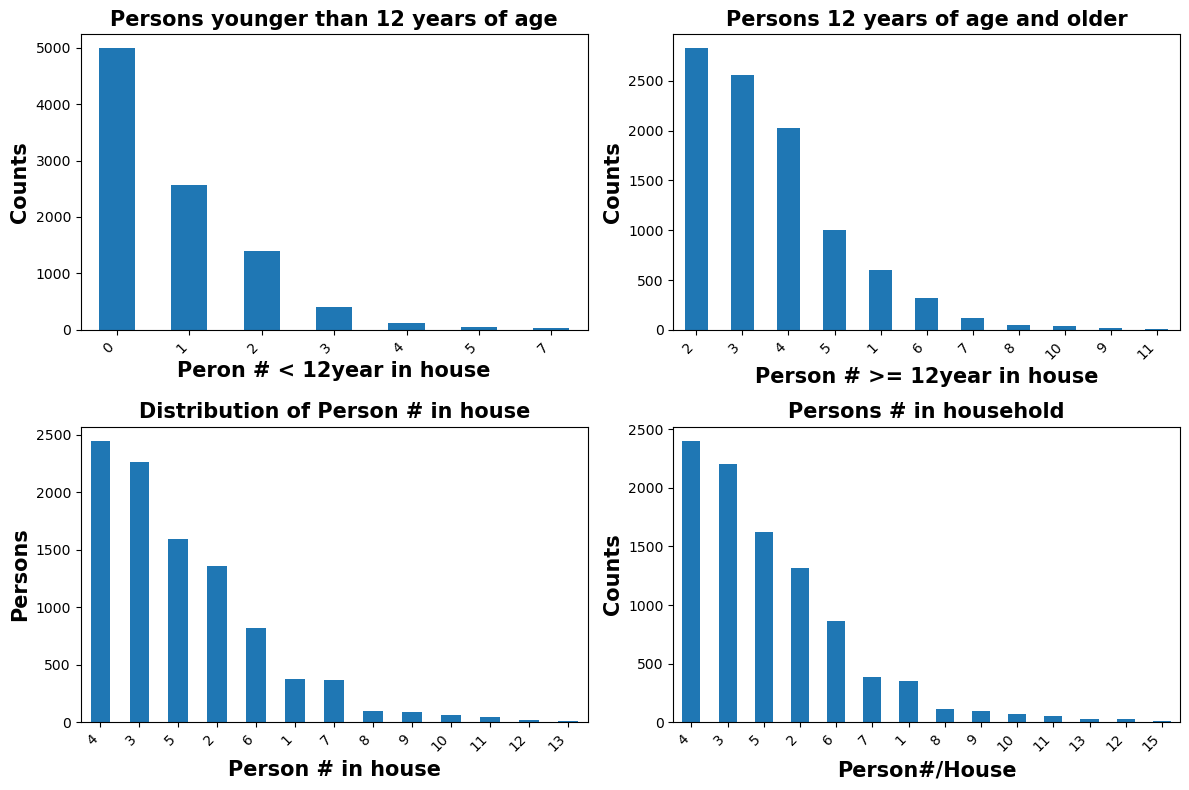

In [20]:
fig, ax = plt.subplots(2,2, figsize=(12,8))

persony = data_train.r4t1.value_counts().plot(kind='bar',ax=ax[0,0])
persony.set_xticklabels(persony.get_xticklabels(), rotation=45, ha="right")
persony.set_xlabel('Peron # < 12year in house', weight='bold', size=15)
persony.set_ylabel('Counts', weight='bold', size=15)
persony.set_title('Persons younger than 12 years of age', weight='bold', size=15)

persono = data_train.r4t2.value_counts().plot(kind='bar',ax=ax[0,1])
persono.set_xticklabels(persono.get_xticklabels(), rotation=45, ha="right")
persono.set_xlabel('Person # >= 12year in house', weight='bold', size=15)
persono.set_ylabel('Counts', weight='bold', size=15)
persono.set_title('Persons 12 years of age and older', weight='bold', size=15)

female = data_train.r4t3.value_counts().plot(kind='bar',ax=ax[1,0])
female.set_xticklabels(female.get_xticklabels(), rotation=45, ha="right")
female.set_xlabel('Person # in house', weight='bold', size=15)
female.set_ylabel('Persons', weight='bold', size=15)
female.set_title('Distribution of Person # in house', weight='bold', size=15)

pliveh = data_train.tamviv.value_counts().plot(kind='bar',ax=ax[1,1])
pliveh.set_xticklabels(pliveh.get_xticklabels(), rotation=45, ha="right")
pliveh.set_xlabel('Person#/House', weight='bold', size=15)
pliveh.set_ylabel('Counts', weight='bold', size=15)
pliveh.set_title('Persons # in household', weight='bold', size=15)

plt.tight_layout()

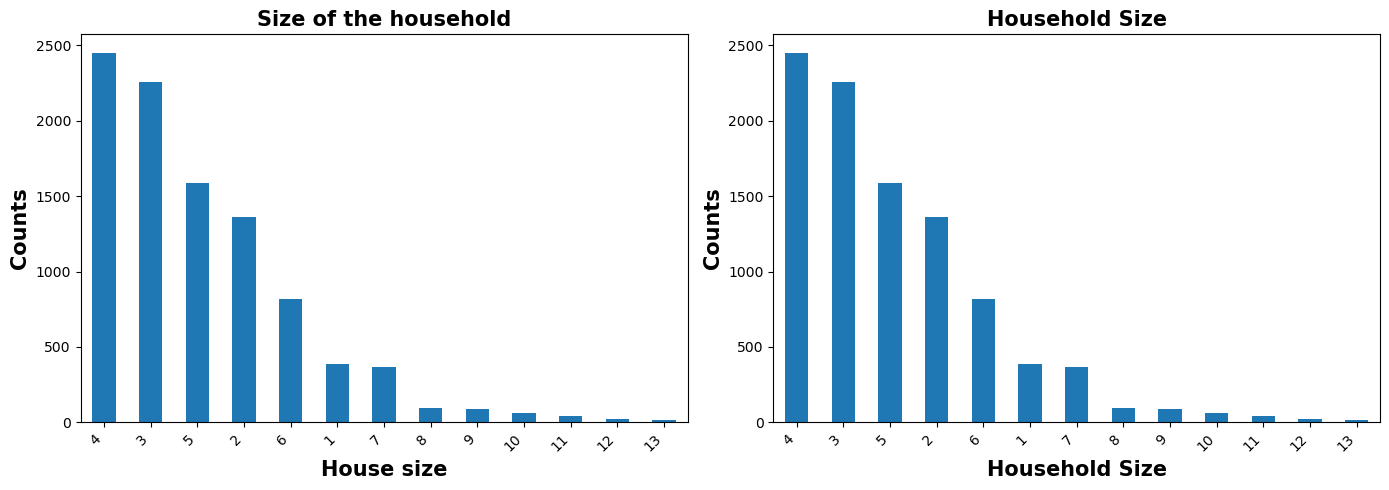

In [21]:
fig, ax = plt.subplots(1,2, figsize=(14,5))

size = data_train.tamhog.value_counts().plot(kind='bar',ax=ax[0])
size.set_xticklabels(size.get_xticklabels(), rotation=45, ha="right")
size.set_xlabel('House size', weight='bold', size=15)
size.set_ylabel('Counts', weight='bold', size=15)
size.set_title('Size of the household', weight='bold', size=15)

hhsize = data_train.hhsize.value_counts().plot(kind='bar',ax=ax[1])
hhsize.set_xticklabels(hhsize.get_xticklabels(), rotation=45, ha="right")
hhsize.set_xlabel('Household Size', weight='bold', size=15)
hhsize.set_ylabel('Counts', weight='bold', size=15)
hhsize.set_title('Household Size', weight='bold', size=15)

plt.tight_layout()

In [22]:
#This comparison shows, two variables ('tamhog', 'hhsize') are identical. Let's see numerically.

In [23]:
null = 0
for diff in range (data_train.shape[0]):
    Difference = 0
    Difference = (data_train.loc[diff,'tamhog'] - data_train.loc[diff,'hhsize'])
    if (Difference==0):
        null = null+1
print('Total 0 value = {} among {} value'.format(null,data_train.shape[0]))

Total 0 value = 9557 among 9557 value


In [24]:
#Thus the columns contains identical values and so we can drop any one of them.

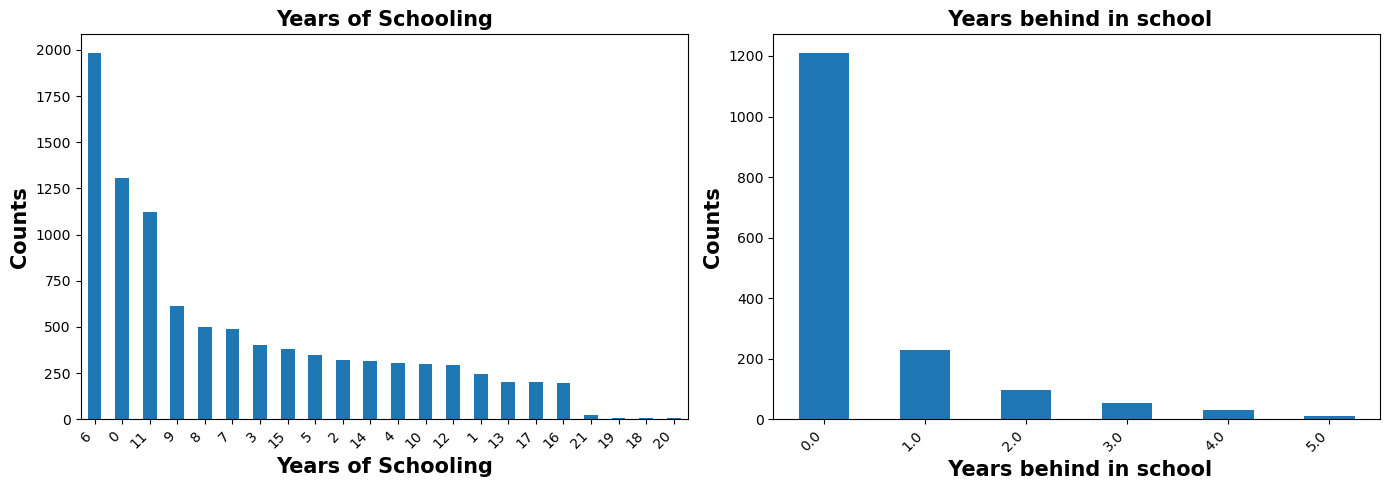

In [25]:
fig, ax = plt.subplots(1,2, figsize=(14,5))

yearsch = data_train.escolari.value_counts().plot(kind='bar',ax=ax[0])
yearsch.set_xticklabels(yearsch.get_xticklabels(), rotation=45, ha="right")
yearsch.set_xlabel('Years of Schooling', weight='bold', size=15)
yearsch.set_ylabel('Counts', weight='bold', size=15)
yearsch.set_title('Years of Schooling', weight='bold', size=15)

yearschl = data_train.rez_esc.value_counts().plot(kind='bar',ax=ax[1])
yearschl.set_xticklabels(yearschl.get_xticklabels(), rotation=45, ha="right")
yearschl.set_xlabel(' Years behind in school', weight='bold', size=15)
yearschl.set_ylabel('Counts', weight='bold', size=15)
yearschl.set_title(' Years behind in school', weight='bold', size=15)

plt.tight_layout()

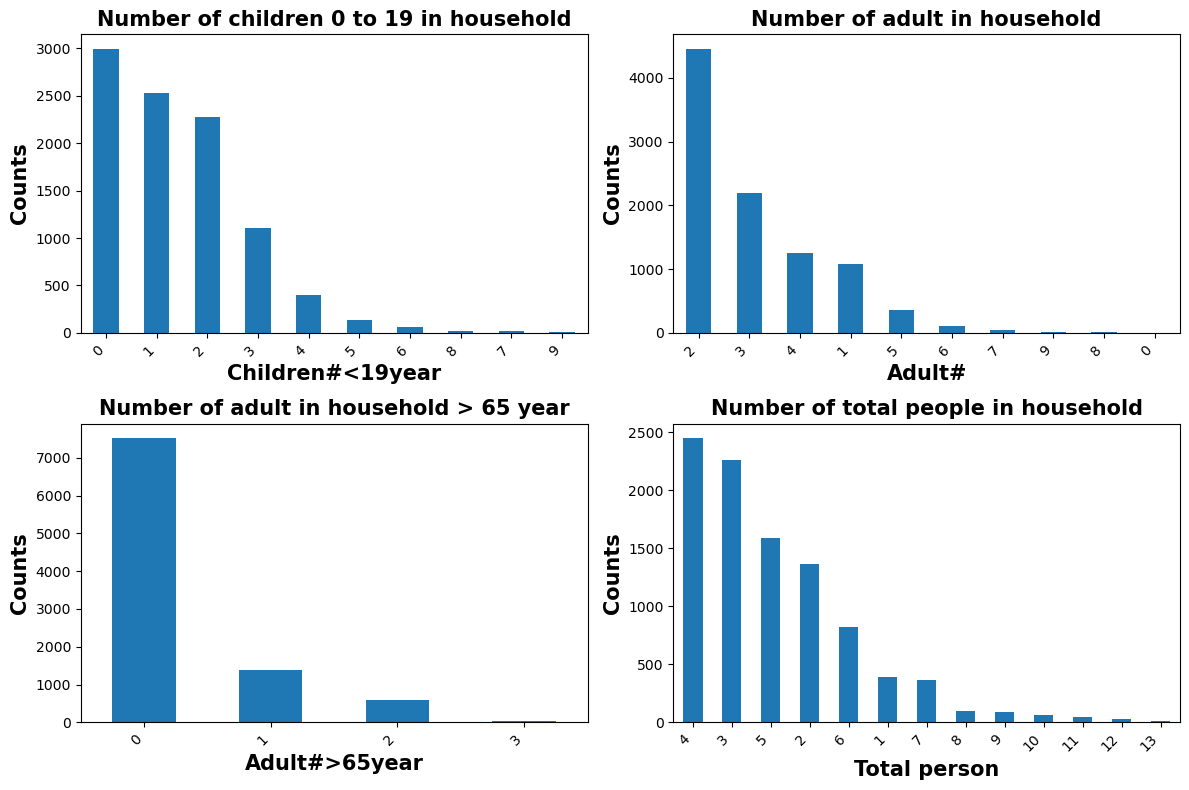

In [26]:
fig, ax = plt.subplots(2,2, figsize=(12,8))

child19 = data_train.hogar_nin.value_counts().plot(kind='bar',ax=ax[0,0])
child19.set_xticklabels(child19.get_xticklabels(), rotation=45, ha="right")
child19.set_xlabel('Children#<19year', weight='bold', size=15)
child19.set_ylabel('Counts', weight='bold', size=15)
child19.set_title('Number of children 0 to 19 in household', weight='bold', size=15)

adult = data_train.hogar_adul.value_counts().plot(kind='bar',ax=ax[0,1])
adult.set_xticklabels(adult.get_xticklabels(), rotation=45, ha="right")
adult.set_xlabel('Adult#', weight='bold', size=15)
adult.set_ylabel('Counts', weight='bold', size=15)
adult.set_title('Number of adult in household', weight='bold', size=15)

ageg65 = data_train.hogar_mayor.value_counts().plot(kind='bar',ax=ax[1,0])
ageg65.set_xticklabels(ageg65.get_xticklabels(), rotation=45, ha="right")
ageg65.set_xlabel('Adult#>65year', weight='bold', size=15)
ageg65.set_ylabel('Counts', weight='bold', size=15)
ageg65.set_title('Number of adult in household > 65 year', weight='bold', size=15)

totalno = data_train.hogar_total.value_counts().plot(kind='bar',ax=ax[1,1])
totalno.set_xticklabels(totalno.get_xticklabels(), rotation=45, ha="right")
totalno.set_xlabel('Total person', weight='bold', size=15)
totalno.set_ylabel('Counts', weight='bold', size=15)
totalno.set_title('Number of total people in household', weight='bold', size=15)

plt.tight_layout()

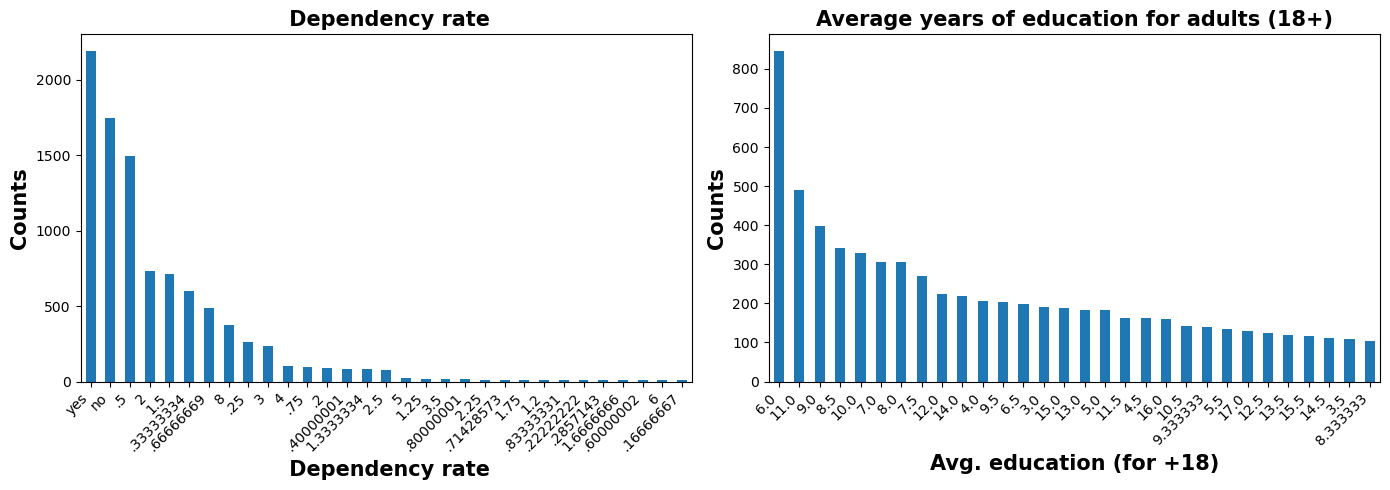

In [27]:
fig, ax = plt.subplots(1,2, figsize=(14,5))

dependency = data_train.dependency.value_counts().plot(kind='bar',ax=ax[0])
dependency.set_xticklabels(dependency.get_xticklabels(), rotation=45, ha="right")
dependency.set_xlabel(' Dependency rate', weight='bold', size=15)
dependency.set_ylabel('Counts', weight='bold', size=15)
dependency.set_title(' Dependency rate', weight='bold', size=15)

meanedu = data_train.meaneduc.value_counts().head(30).plot(kind='bar',ax=ax[1])
meanedu.set_xticklabels(meanedu.get_xticklabels(), rotation=45, ha="right")
meanedu.set_xlabel('Avg. education (for +18)', weight='bold', size=15)
meanedu.set_ylabel('Counts', weight='bold', size=15)
meanedu.set_title('Average years of education for adults (18+)', weight='bold', size=15)

plt.tight_layout()

In [28]:
data_train.dependency.value_counts().head()

yes    2192
no     1747
.5     1497
2       730
1.5     713
Name: dependency, dtype: int64

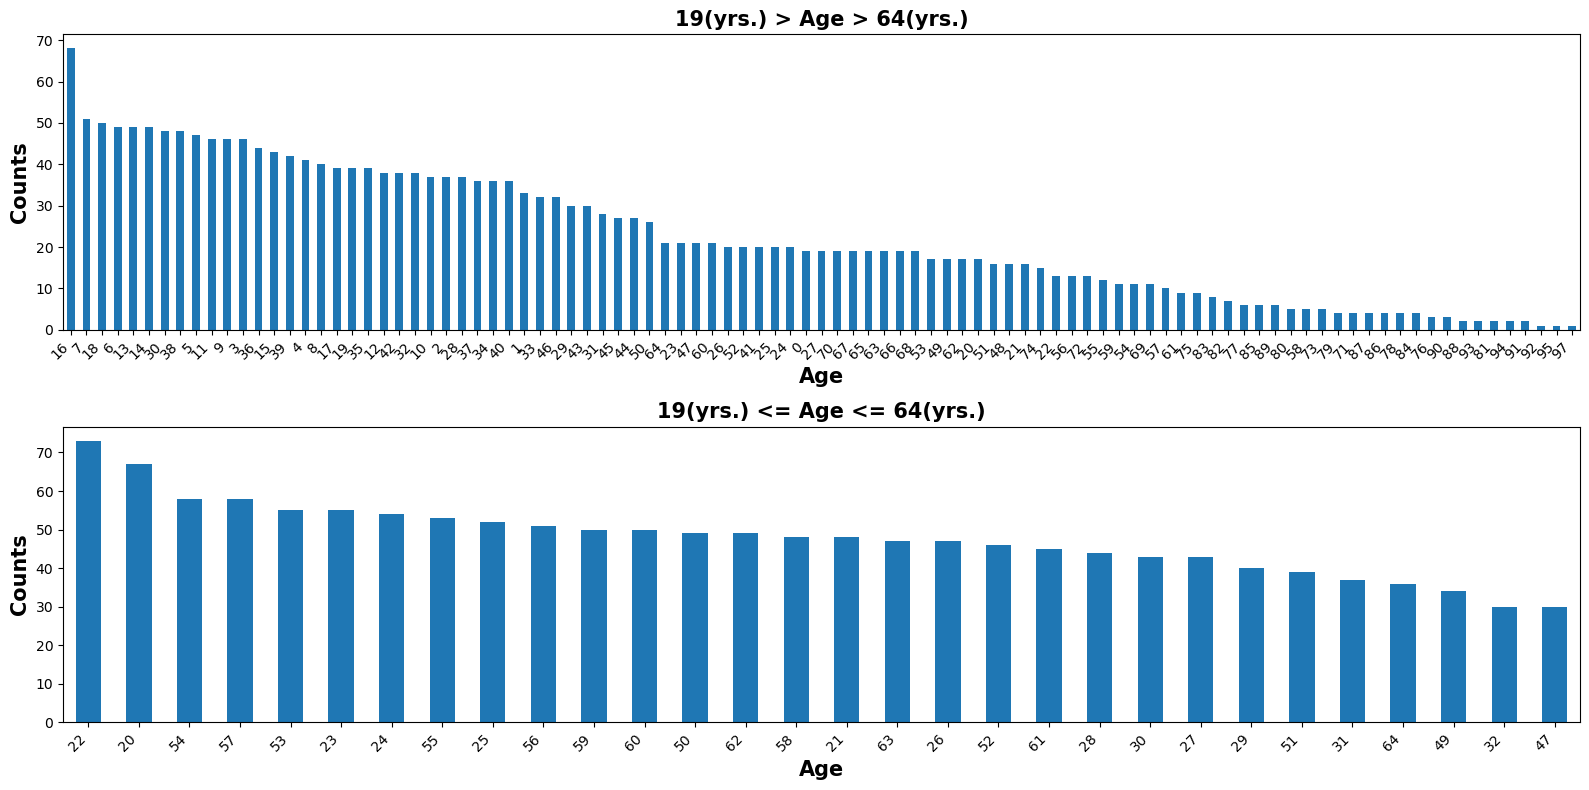

In [29]:
fig, ax = plt.subplots(2,1, figsize=(16,8))

depyes = data_train.loc[(data_train.dependency=='yes'),'age'].value_counts().plot(kind='bar',ax=ax[0])
depyes.set_xticklabels(depyes.get_xticklabels(), rotation=45, ha="right")
depyes.set_xlabel('Age', weight='bold', size=15)
depyes.set_ylabel('Counts', weight='bold', size=15)
depyes.set_title('19(yrs.) > Age > 64(yrs.)', weight='bold', size=15)

depno = data_train.loc[(data_train.dependency=='no'),'age'].value_counts().head(30).plot(kind='bar',ax=ax[1])
depno.set_xticklabels(depno.get_xticklabels(), rotation=45, ha="right")
depno.set_xlabel('Age', weight='bold', size=15)
depno.set_ylabel('Counts', weight='bold', size=15)
depno.set_title('19(yrs.) <= Age <= 64(yrs.)', weight='bold', size=15)

plt.tight_layout()

In [30]:
#If we look carefully, then it is clear that 'no' category contains age values from 19 to 64 yrs. which is expected.

#Similarly, 'yes' category should contain an age value of less than 19 and greater than 64. However, there is some observation where this does not holds.

#So we can replace yes by 1 and no by 0.

In [31]:
data_train['dep_corected'] = data_train.dependency.replace({'yes':float(1),'no':float(0)})
data_train.loc[((data_train.dependency=='yes')|(data_train.dependency=='no')),['dep_corected','dependency']].sample(6)

,dep_corected,dependency
3495,1.0,yes
7356,1.0,yes
5965,0.0,no
1906,0.0,no
8014,1.0,yes
4903,0.0,no


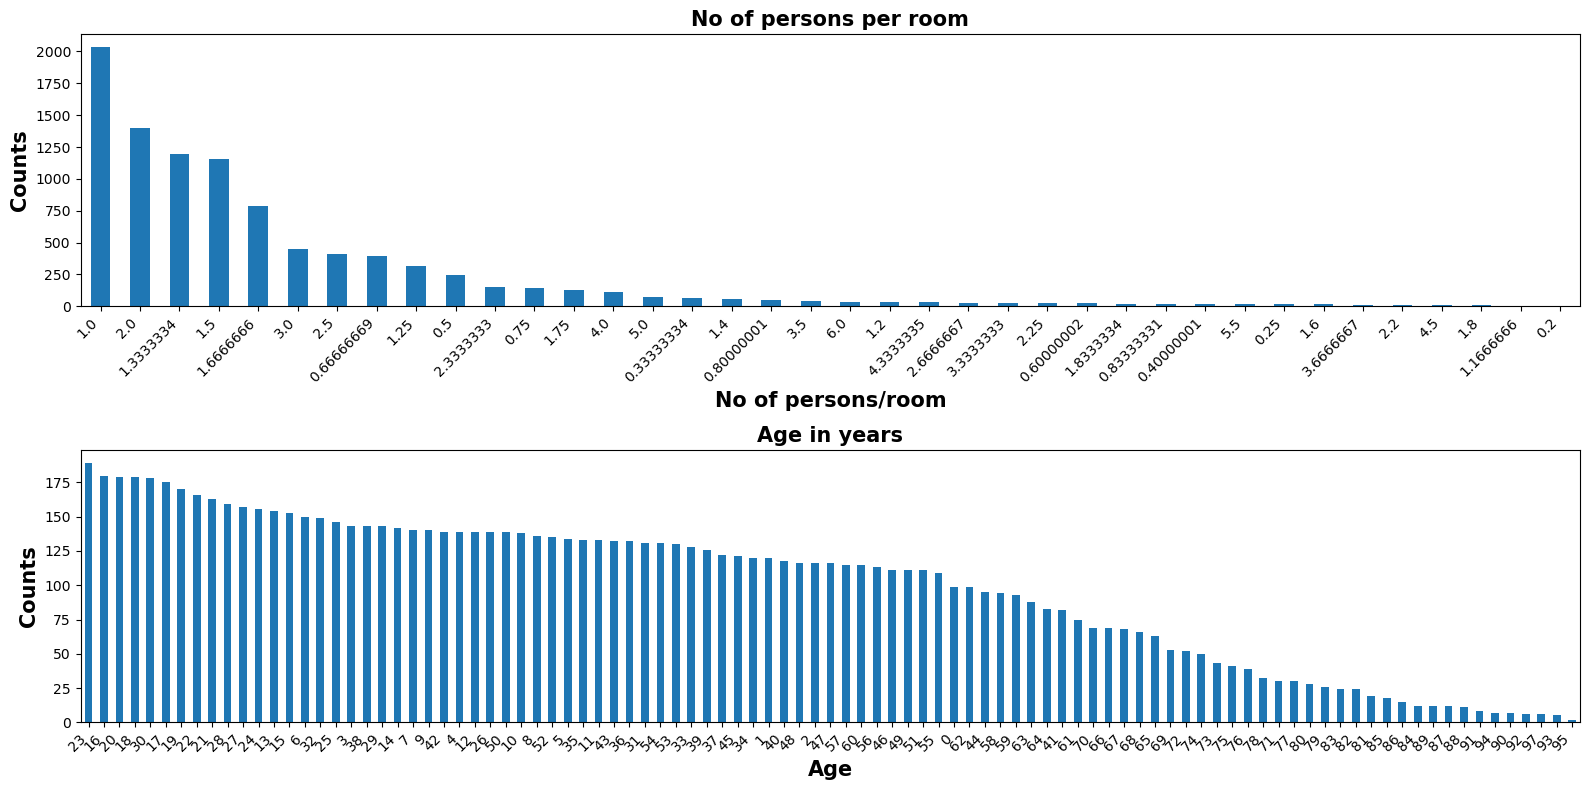

In [32]:
fig, ax = plt.subplots(2,1, figsize=(16,8))

overcrd = data_train.overcrowding.value_counts().plot(kind='bar',ax=ax[0])
overcrd.set_xticklabels(overcrd.get_xticklabels(), rotation=45, ha="right")
overcrd.set_xlabel('No of persons/room', weight='bold', size=15)
overcrd.set_ylabel('Counts', weight='bold', size=15)
overcrd.set_title('No of persons per room', weight='bold', size=15)

agey = data_train.age.value_counts().plot(kind='bar',ax=ax[1])
agey.set_xticklabels(agey.get_xticklabels(), rotation=45, ha="right")
agey.set_xlabel('Age', weight='bold', size=15)
agey.set_ylabel('Counts', weight='bold', size=15)
agey.set_title('Age in years', weight='bold', size=15)

plt.tight_layout()

In [33]:
data_train.describe(include='object')

,Id,idhogar,dependency,edjefe,edjefa,dep_corected
count,9557,9557,9557,9557,9557,9557.0
unique,9557,2988,31,22,22,31.0
top,ID_279628684,fd8a6d014,yes,no,no,1.0
freq,1,13,2192,3762,6230,2192.0


In [34]:
#So there is no categorical variable that has a single unique value.

#However, we need to convert these 'edjefe' and 'edjefa' columns (features) from object to numeric type.

In [35]:
data_train['edjefe1'] = data_train.edjefe.replace({'yes':float(1),'no':float(0)})
data_train['edjefa1'] = data_train.edjefa.replace({'yes':float(1),'no':float(0)})
data_train.loc[((data_train.edjefe=='yes')|(data_train.edjefe=='no')|(data_train.edjefa=='yes')|(data_train.edjefa=='no')),
               ['edjefe','edjefe1','edjefa','edjefa1']].sample(6)

,edjefe,edjefe1,edjefa,edjefa1
823,no,0.0,6,6
3121,no,0.0,7,7
2412,no,0.0,6,6
4617,3,3,no,0.0
8670,no,0.0,6,6
880,5,5,no,0.0


In [36]:
#Let's find if there any continuous variables which have 0 variances.
variance = pow(data_train.drop(columns={'Id','Target','dependency'}).std(),2).to_dict()

null_cnt = 0
for key, value in variance.items():
    if(value==0):
        print('Name = ',key)
        null_cnt = null_cnt+1
print('No of columns which has zero variance = ',null_cnt)

Name =  elimbasu5
No of columns which has zero variance =  1


In [37]:
#So we need to drop this variable as well. since it has 0 variance which basically indicates a single entry and does not influence the outcome.

#Now dropping the unnecessary variables, let's clean the data for subsequent processing.
train = data_train.drop(columns={'Id','idhogar','tamhog','dependency','elimbasu5','edjefe','edjefa'})
train.shape

(9557, 139)

### 3.Check if there are any biases in your dataset.

Biases in data are usually checked by examining the outliers, null values, deviation from expected values of the feature. The same can be performed using statistical methods.

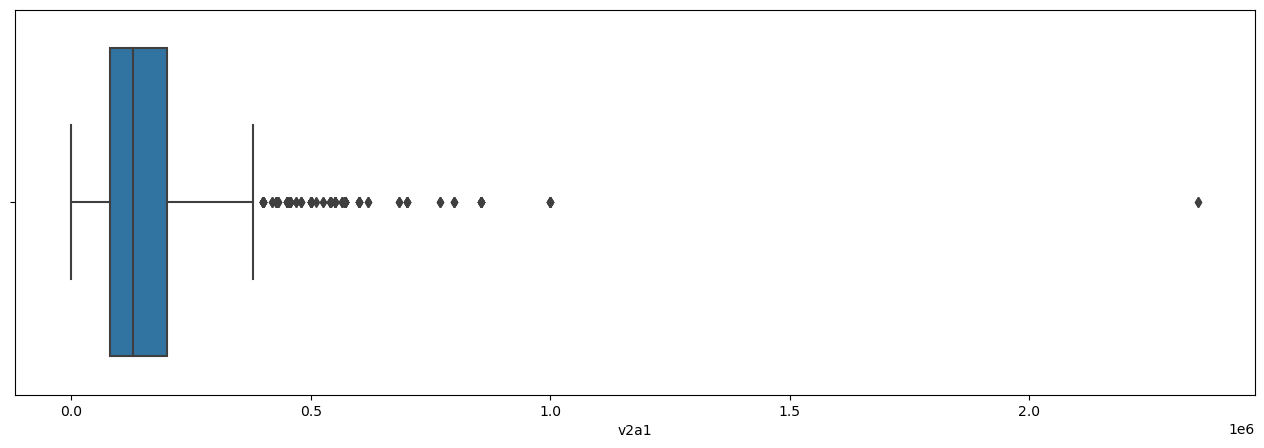

In [38]:
plt.figure(figsize = (16,5))
box = sns.boxplot(x = train.v2a1)
plt.show()

In [39]:
import scipy.stats as stat 
result = stat.chi2_contingency(pd.crosstab(train.v18q1, train.v18q))

if (result[1]<.05):
    print('Feature v18q and v18q1 has some relation')
else:
    print('Feature v18q and v18q1 has no relation since p-value =',result[1])

Feature v18q and v18q1 has no relation since p-value = 1.0


### 4.Check whether all members of the house have the same poverty level

In [40]:
proverty_level = data_train.groupby(['idhogar','Target'])['idhogar'].count().to_frame().rename(
    columns={'idhogar':'Count'}).reset_index().sort_values(['Count'],ascending=False)
proverty_level.head(8)

,idhogar,Target,Count
3032,fd8a6d014,1,13
155,0c7436de6,4,12
2101,ae6cf0558,3,12
841,4476ccd4c,4,11
1320,6b35cdcf0,4,11
2199,b7a0b59d7,2,11
201,0fc6c05f7,4,10
1307,6a96a96c0,4,10


As it is clear from the above data frame that the id's corresponding to the house only has a single Target type with single/multiple house members.

### 5.Check if there is a house without a family head.

In [41]:
train.parentesco1.value_counts().to_frame().reset_index().rename(columns={'index':'Present/Not','parentesco1':'Counts'})

,Present/Not,Counts
0,0,6584
1,1,2973


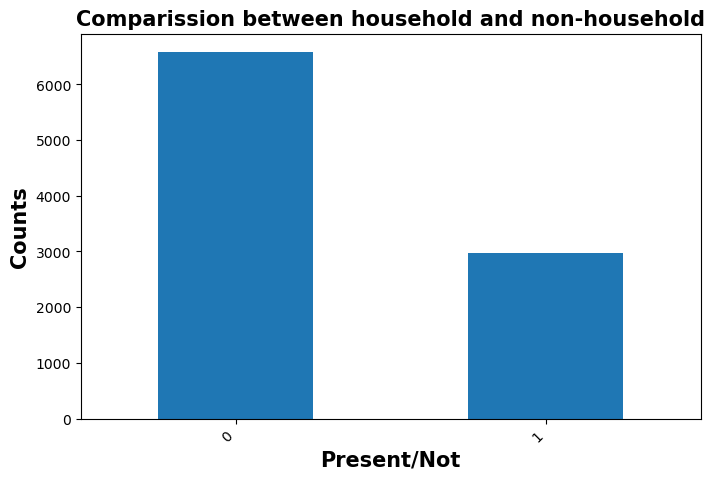

In [42]:
plt.figure(figsize=(8,5))
rent = train.parentesco1.value_counts().plot(kind='bar')
rent.set_xticklabels(rent.get_xticklabels(), rotation=45, ha="right")
rent.set_xlabel('Present/Not', weight='bold', size=15)
rent.set_ylabel('Counts', weight='bold', size=15)
rent.set_title('Comparission between household and non-household', weight='bold', size=15)
plt.show()

1 indicates the proportion of household-based on Id.

However, it does not imply with 0 has no household. It simply based on Id.

To get the number of the house without any house head, we need to calculate the number of houses where no male and/ female house head are present

In [43]:
no_head = len(train[((train.edjefa1==0) & (train.edjefe1==0))].index)
print('No. of house without family head = ',no_head)

No. of house without family head =  435


### 6.Set poverty level of the members and the head of the house within a family.

There are different parameters which can be used in a various way to define the poverty level. However, in a simple approach, we introduce a few parameters to define poverty level.

Since depending upon the distribution of the parameters, the index for poverty level needs to be defined. Thus, without going to further in-depth details, we can use mean or median for such analysis.

And the for the missing data treatment -

the nan value in 'v18q1' indicates the person does not have any tables, so replaced by 0.
the nan value in 'v2a1' indicates the person owns the house, so replaced by the mean value.

In [44]:
proverty_lev = data_train[['v2a1','hhsize','rooms','v18q1','refrig']]
proverty_lev = proverty_lev.fillna(value={'v2a1':0, 'v18q1':0})
proverty_lev['Level'] = (proverty_lev.v2a1+proverty_lev.rooms+proverty_lev.v18q1+proverty_lev.hhsize+proverty_lev.refrig)

prov_median_rent = (proverty_lev.v2a1[proverty_lev.v2a1!=0].median()+proverty_lev.rooms.median()+proverty_lev.v18q1.median()+
                    proverty_lev.hhsize.median()+1)
prov_median_own = (proverty_lev.rooms[proverty_lev.v2a1==0].median()+proverty_lev.v18q1.median()+proverty_lev.hhsize.median()+1)

print('Index as per median for rent =', prov_median_rent)
print('Index as per median for ownerhip =', prov_median_own)

for i in range (len(proverty_lev.v2a1)):
    if (((proverty_lev.at[i,'v2a1']==0)&(proverty_lev.at[i,'Level']<prov_median_own))|
        ((proverty_lev.at[i,'v2a1']!=0)&(proverty_lev.at[i,'Level']<prov_median_rent))):
        proverty_lev.at[i,'Status(median)'] = 'Below proverty'
    else:
        proverty_lev.at[i,'Status(median)'] = 'Above proverty'
        
prov_mean_rent = (proverty_lev.v2a1[proverty_lev.v2a1!=0].mean()+proverty_lev.rooms.mean()+proverty_lev.v18q1.mean()+
                  proverty_lev.hhsize.mean()+1)
prov_mean_own = (proverty_lev.rooms[proverty_lev.v2a1==0].mean()+proverty_lev.v18q1.mean()+proverty_lev.hhsize.mean()+1)

print('Index as per mean for rent =', prov_mean_rent)
print('Index as per mean for ownerhip =', prov_mean_own)

for i in range (len(proverty_lev.v2a1)):
    if (((proverty_lev.at[i,'v2a1']==0)&(proverty_lev.at[i,'Level']<prov_mean_own))|
        ((proverty_lev.at[i,'v2a1']!=0)&(proverty_lev.at[i,'Level']<prov_mean_rent))):
        proverty_lev.at[i,'Status(mean)'] = 'Below proverty'
    else:
        proverty_lev.at[i,'Status(mean)'] = 'Above proverty'

proverty_lev.sample(10)

Index as per median for rent = 130010.0
Index as per median for ownerhip = 10.0
Index as per mean for rent = 167037.8827028361
Index as per mean for ownerhip = 10.356989811974278


,v2a1,hhsize,rooms,v18q1,refrig,Level,Status(median),Status(mean)
4234,180000.0,7,7,1.0,1,180016.0,Above proverty,Above proverty
7305,0.0,3,5,0.0,1,9.0,Below proverty,Below proverty
9126,0.0,4,4,0.0,1,9.0,Below proverty,Below proverty
3056,0.0,4,3,0.0,1,8.0,Below proverty,Below proverty
709,0.0,4,4,0.0,1,9.0,Below proverty,Below proverty
8746,0.0,2,5,0.0,1,8.0,Below proverty,Below proverty
2114,0.0,5,6,3.0,1,15.0,Above proverty,Above proverty
8447,0.0,11,4,0.0,0,15.0,Above proverty,Above proverty
6113,0.0,3,4,0.0,1,8.0,Below proverty,Below proverty
5188,110000.0,4,4,0.0,1,110009.0,Below proverty,Below proverty


In [45]:
print('Based on median calculation ---------')
print(proverty_lev['Status(median)'].value_counts())
print('\n\n')
print('Based on mean calculation ---------')
print(proverty_lev['Status(mean)'].value_counts())

Based on median calculation ---------
Above proverty    5305
Below proverty    4252
Name: Status(median), dtype: int64



Based on mean calculation ---------
Below proverty    5761
Above proverty    3796
Name: Status(mean), dtype: int64


### 7. Count how many null values are existing in columns

In [46]:
null_data = train.isnull().sum().to_dict()
for key, value in null_data.items():
    if(value!=0):
        print('Name = ',key,'\t Value = ',value,'\t In percent = ',np.around((value*100)/data_train.shape[0],decimals=2),'%')

Name =  v2a1 	 Value =  6860 	 In percent =  71.78 %
Name =  v18q1 	 Value =  7342 	 In percent =  76.82 %
Name =  rez_esc 	 Value =  7928 	 In percent =  82.95 %
Name =  meaneduc 	 Value =  5 	 In percent =  0.05 %
Name =  SQBmeaned 	 Value =  5 	 In percent =  0.05 %


'v2a1','v18q1','rez_esc' - these three columns contain null-data more than 70%, whereas this two columns ('meaneduc' and 'SQBmeaned') contain very few null data, less than 1% (~0.05%). So we should drop these three columns or replace the missing values with appropriate/suitable values, such as mean/median/mode, etc.

However, in this present problem, rows with null values need to be replaced.

### 8. Remove null value rows of the target variable.

In [47]:
train1 = train.dropna()
train1.isnull().sum().any()

False

In [48]:
train1.shape

(156, 139)

As, it is clear from the prescribed analysis dropping rows with null values yields a very small part of data, based on which we can not predict any model.

So, to build a proper model we need to replace the null values as mentioned earlier.

In [49]:
train.shape

(9557, 139)

### 9.Replacing the missing values with appropriate/suitable values

In [50]:
train = train.fillna(value={'v2a1':0, 'v18q1':0})

 - Since we modified these two columns, hence we can drop the columns ('tipovivi3' and 'v18q') which represents weather entry has ye/no.
 - Also, the columns 'rez_esc' contain missing value more than 70% and do not has any impact on Target variables. So we drop it as well.

In [51]:
train = train.drop(columns={'tipovivi3','v18q','rez_esc'})
train.shape

(9557, 136)

To replace the missing value in 'meaneduc' and 'SQBmeaned', we need to check which statistical parameters is valid and then replace these by the corresponding values.

In [52]:
print('Mean Values ----')
print(train[['meaneduc','SQBmeaned']].mean())
print('\n')
print('Mode values ----')
print(train[['meaneduc','SQBmeaned']].mode())
print('\n')
print('Median values ----')
print(train[['meaneduc','SQBmeaned']].median())
print('\n')
print('Standard Deviation ----')
(train[['meaneduc','SQBmeaned']].std())

Mean Values ----
meaneduc       9.231523
SQBmeaned    102.588867
dtype: float64


Mode values ----
   meaneduc  SQBmeaned
0       6.0       36.0


Median values ----
meaneduc      9.0
SQBmeaned    81.0
dtype: float64


Standard Deviation ----


meaneduc      4.167694
SQBmeaned    93.516890
dtype: float64

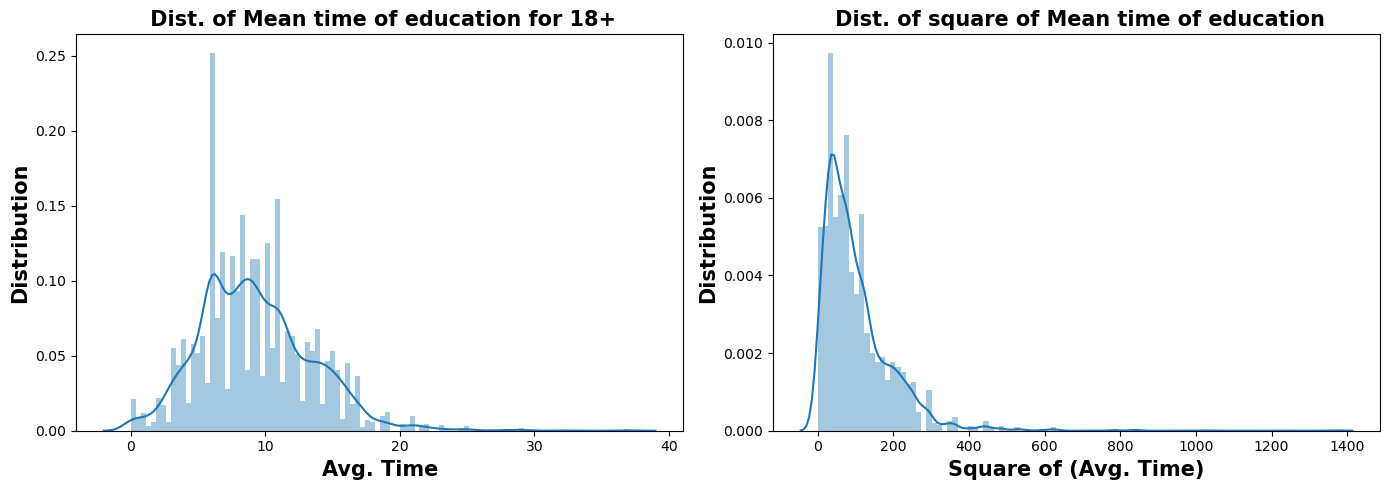

In [53]:
fig, ax = plt.subplots(1,2, figsize=(14,5))

avg_time_ab18 = sns.distplot(train.meaneduc, bins=100, kde=True, ax=ax[0])
avg_time_ab18.set_xlabel('Avg. Time', weight='bold', size=15)
avg_time_ab18.set_ylabel('Distribution', weight='bold', size=15)
avg_time_ab18.set_title(' Dist. of Mean time of education for 18+', weight='bold', size=15)

avg_time_sqrt = sns.distplot(train.SQBmeaned, bins=100, kde=True, ax=ax[1])
avg_time_sqrt.set_xlabel('Square of (Avg. Time)', weight='bold', size=15)
avg_time_sqrt.set_ylabel('Distribution', weight='bold', size=15)
avg_time_sqrt.set_title(' Dist. of square of Mean time of education', weight='bold', size=15)

plt.tight_layout()

From the distribution as well as from the statistic, mentioned above, it is clear that,

 - for average time of education for 18+ ('meaneduc'), the mean and median almost same so we can replace by any one of them.

 - however, for square of average time of education ('SQBmeaned'), the mean and median are quite different. In this scenario, it is more preferable to replace the missing values by mean.

In [54]:
train = train.fillna(value={'meaneduc': train.meaneduc.mean(), 'SQBmeaned': train.SQBmeaned.mean()})
train.isnull().sum().any()

False

In [55]:
train.shape

(9557, 136)

### 10.Feature engineering

In [56]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
feature = train.drop(columns='Target')
target = train.Target
print(feature.shape)
print(target.shape)

(9557, 135)
(9557,)


In [57]:
ss.fit(feature)
feature_ss = ss.fit_transform(feature)

### 11.Predict the accuracy using random forest classifier.

In [58]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state=7)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y = train_test_split(feature_ss,target,test_size=.3,random_state=7)
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(6689, 135)
(6689,)
(2868, 135)
(2868,)


In [59]:
model = forest.fit(train_x,train_y)
print('Model Score of train data : ',forest.score(train_x,train_y))
print('Model Score of test data : ',forest.score(test_x,test_y))

Model Score of train data :  1.0
Model Score of test data :  0.9128312412831241


In [60]:
print('Accuracy score =',accuracy_score(forest.predict(test_x),test_y))

Accuracy score = 0.9128312412831241


In [61]:
confusion_matrix(forest.predict(test_x),test_y)

array([[ 154,   11,    1,    3],
       [  14,  390,   19,    7],
       [   0,   11,  267,    3],
       [  35,   77,   69, 1807]], dtype=int64)

### 12.Prepare test data set and predict the results

In [62]:
test = data_test
test['dep_corected'] = test.dependency.replace({'yes':float(1),'no':float(0)})
test['edjefe1'] = test.edjefe.replace({'yes':float(1),'no':float(0)})
test['edjefa1'] = test.edjefa.replace({'yes':float(1),'no':float(0)})
test = test.fillna(value={'v2a1':0, 'v18q1':0,'meaneduc': test.meaneduc.mean(), 'SQBmeaned': test.SQBmeaned.mean()},
                   inplace=True)
test = data_test.drop(columns={'Id','idhogar','tamhog','dependency','elimbasu5','edjefe','edjefa','tipovivi3','v18q','rez_esc'})
print('Is there any missing data ? ',test.isnull().sum().any())
ss.fit(test)
test_ss = ss.fit_transform(test)
print('Shape =', test.shape)

Is there any missing data ?  False
Shape = (23856, 135)


In [63]:
test_pred = model.predict(test_ss)
print('Prediction for test data = ',test_pred)

Prediction for test data =  [4 4 4 ... 4 4 4]


#### Check the accuracy using random forest with cross validation.

In [64]:
print('Parameters currently in use---------\n')
print(forest.get_params())

Parameters currently in use---------

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 7, 'verbose': 0, 'warm_start': False}


In [67]:
from sklearn.model_selection import GridSearchCV

params = {'n_estimators':[10,50,100,300],'max_depth':[3,5,10,15]}
grid = zip([forest],[params])
best_=None

for i, j in grid:
    a = GridSearchCV(i,param_grid=j,cv=3,n_jobs=1)
    a.fit(train_x, train_y)
    if best_ is None:
        best_ = a
    elif a.best_score_>best_.best_score_:
        best_ = a
        
print ("Best CV Score",best_.best_score_)
print ("Model Parameters",best_.best_params_)
print("Best Estimator",best_.best_estimator_)

ran_for_class = best_.best_estimator_
model_cv = ran_for_class.fit(train_x, train_y)

Best CV Score 0.8445192834500513
Model Parameters {'max_depth': 15, 'n_estimators': 300}
Best Estimator RandomForestClassifier(max_depth=15, n_estimators=300, random_state=7)


In [68]:
print('Accuracy score =',accuracy_score(ran_for_class.predict(test_x),test_y))

Accuracy score = 0.8838912133891214


In [69]:
confusion_matrix(ran_for_class.predict(test_x),test_y)

array([[ 143,    9,    0,    2],
       [  16,  354,   19,    6],
       [   2,    8,  227,    1],
       [  42,  118,  110, 1811]], dtype=int64)

In [70]:
print('Model Score of train data : ',ran_for_class.score(train_x,train_y))
print('Model Score of test data : ',ran_for_class.score(test_x,test_y))

Model Score of train data :  0.98280759455823
Model Score of test data :  0.8838912133891214


In [71]:
f1_score(ran_for_class.predict(test_x),test_y,average='weighted')

0.8904471279397697

In [72]:
test_pred_cv = ran_for_class.predict(test_ss)
print('Prediction for test data = ',test_pred_cv)

Prediction for test data =  [4 4 4 ... 4 4 4]
